In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/housing_price.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- price: The price of the property.
- area: The total area of the property in square feet.
- bedrooms: The number of bedrooms in the property.
- bathrooms: The number of bathrooms in the property.
- stories: The number of stories (floors) in the property.
- mainroad: Indicates whether the property is located on a main road (binary: yes/no).
- guestroom: Indicates whether the property has a guest room (binary: yes/no).
- basement: Indicates whether the property has a basement (binary: yes/no).
- hotwaterheating: Indicates whether the property has hot water heating (binary: yes/no).
- airconditioning: Indicates whether the property has air conditioning (binary: yes/no).
- parking: The number of parking spaces available with the property.
- prefarea: Indicates whether the property is in a preferred area (binary: yes/no).
- furnishingstatus: The furnishing status of the property (e.g., furnished, semi-furnished, unfurnished).

### Data understanding 

In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(545, 13)

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
[print(f"{col}: {df[col].unique()}") for col in df.columns]

price: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  490000

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Memilah kolom numerik, kategorik, dan target 

In [75]:
num_cols = df.select_dtypes(include=['int64']).drop(columns='price')
num_cols

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [27]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [30]:
target_col = df.price
target_col

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Visualisasi persebaran kolom numerik 

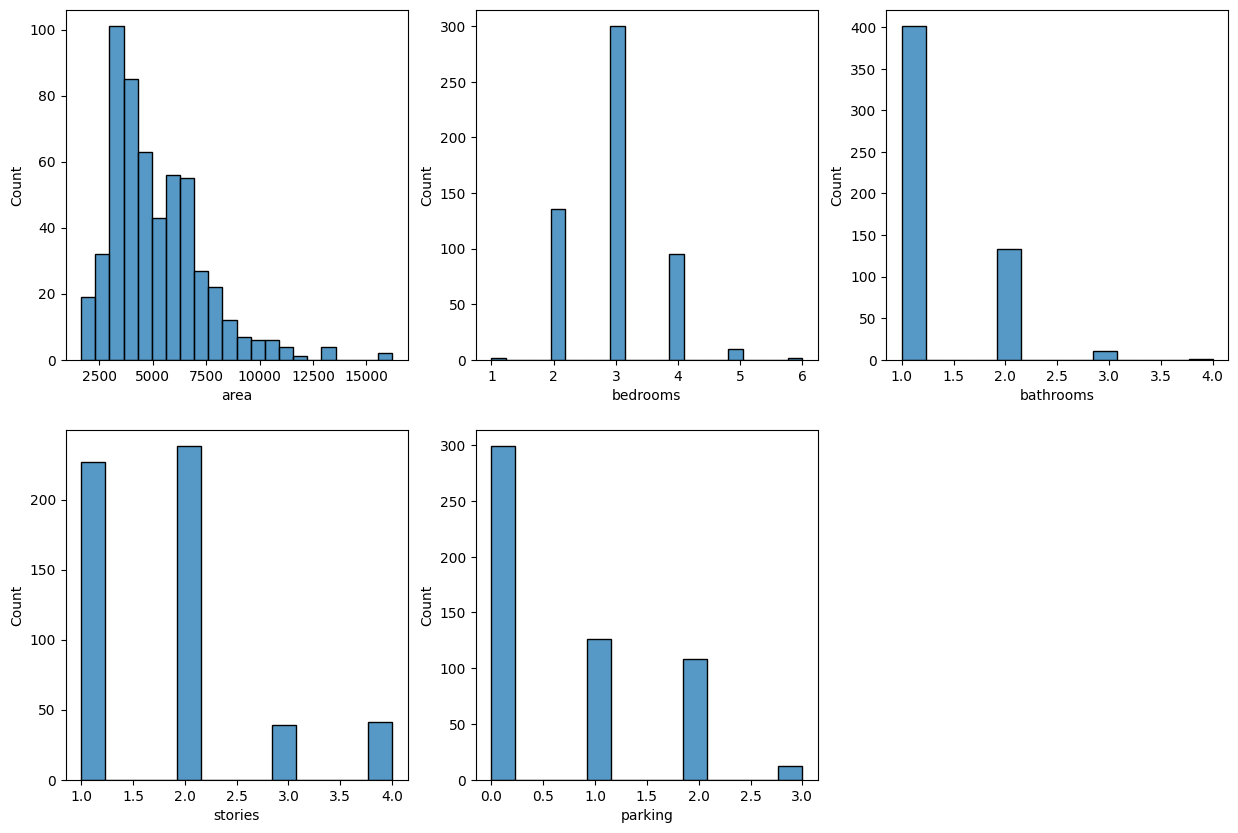

In [33]:
plt.figure(figsize=(15,10))
fig = 1

for col in num_cols:
    plt.subplot(2,3,fig)
    sns.histplot(num_cols,x=col)
    fig+=1

### Visualisasi untuk mencari outliers 

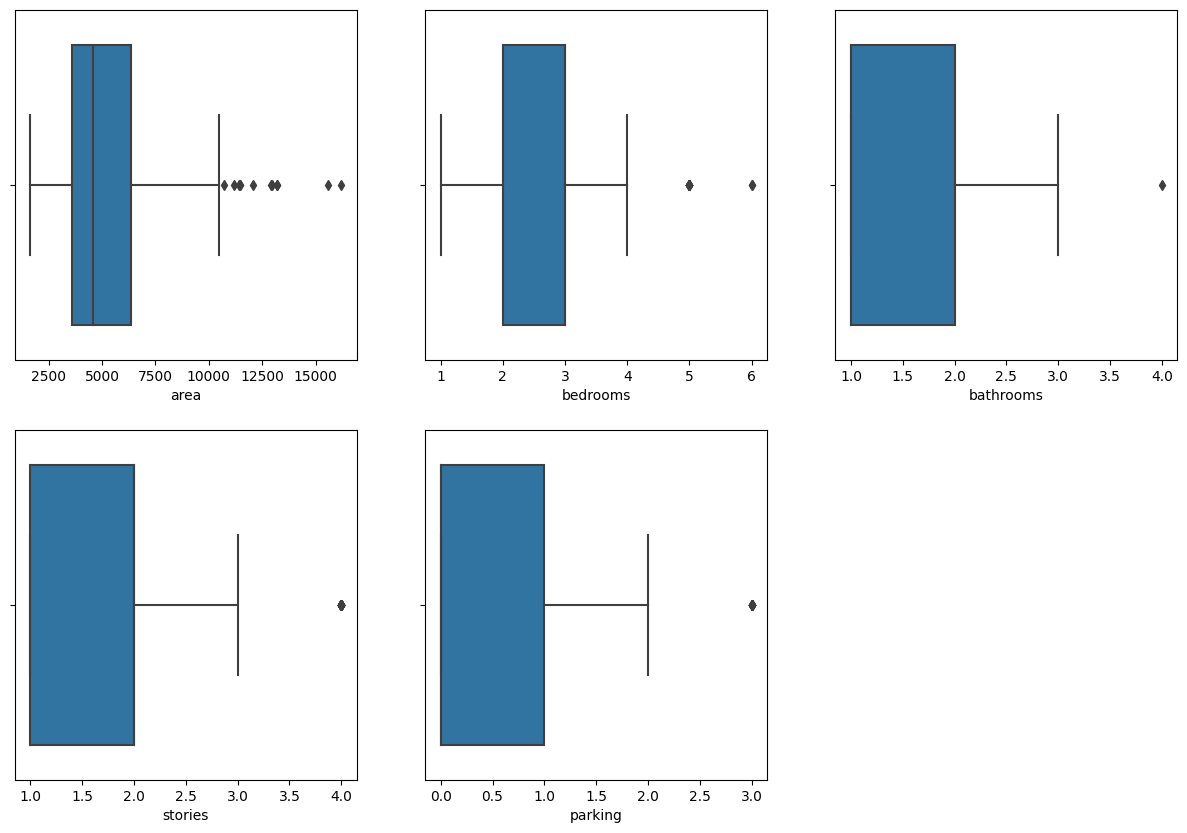

In [71]:
plt.figure(figsize=(15,10))
fig = 1

for col in num_cols:
    plt.subplot(2,3,fig)
    sns.boxplot(num_cols,x=col)
    fig+=1

### Visualisasi persebaran kolom kategorik 

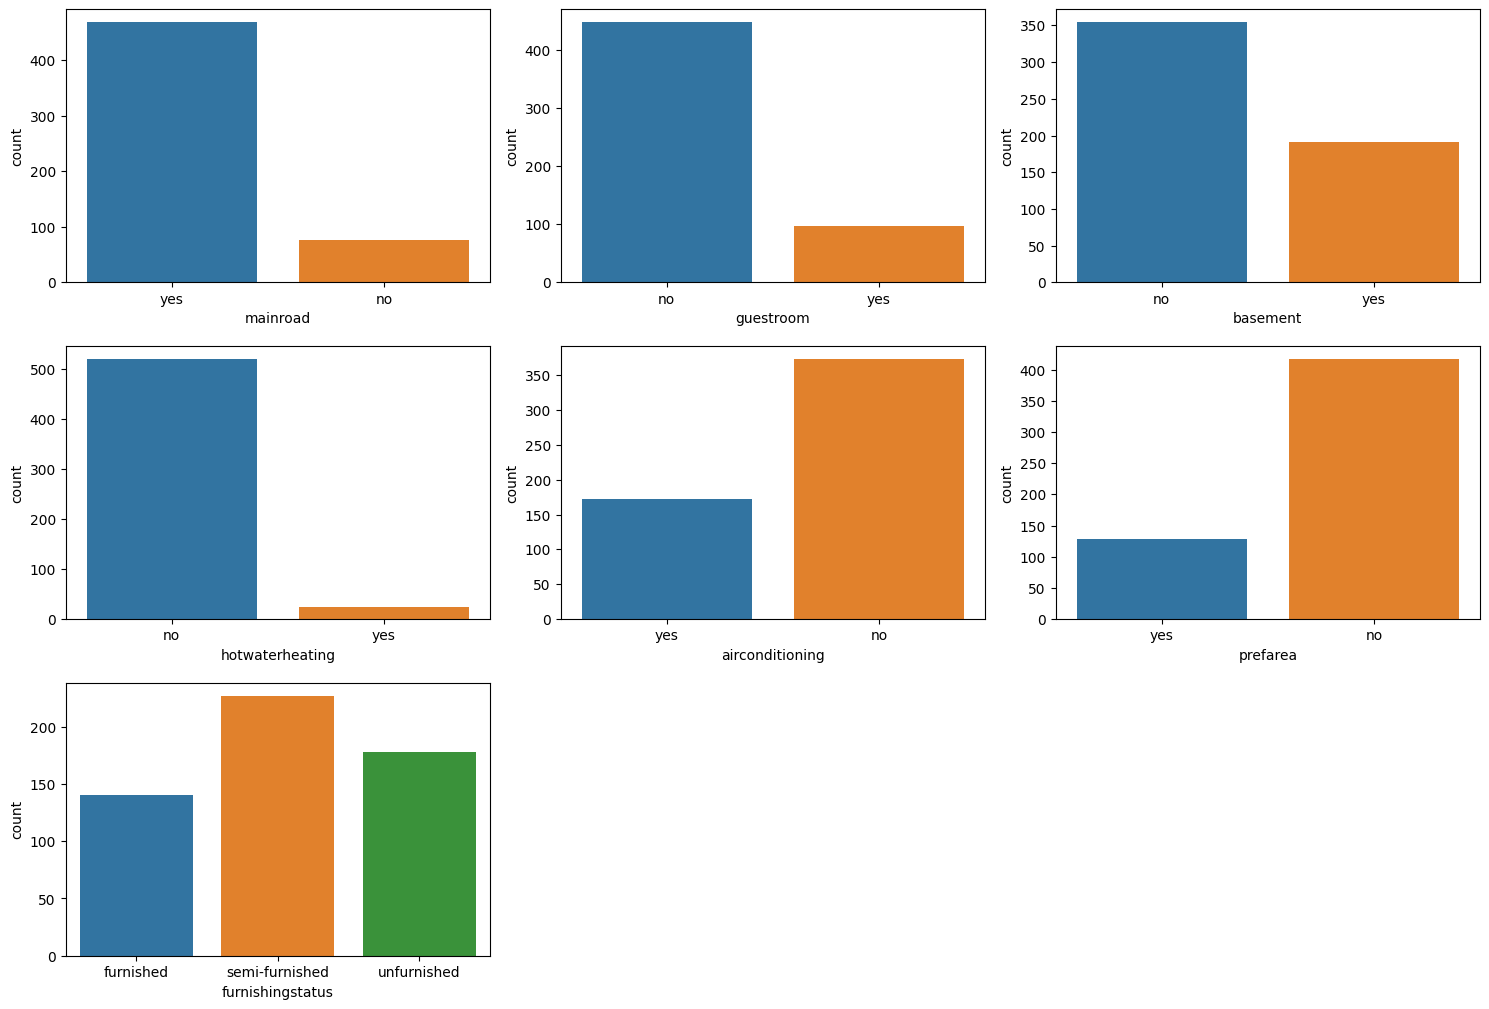

In [41]:
plt.figure(figsize=(15,10))
fig = 1
for col in cat_cols:
    plt.subplot(3,3,fig)
    plt.tight_layout()
    sns.countplot(cat_cols,x=col)
    fig+=1

### Visualisasi persebaran kolom target 

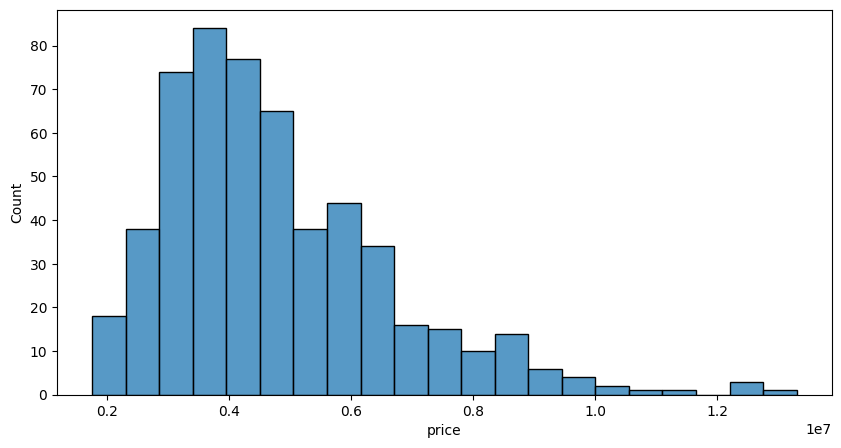

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(target_col);

### Visualisasi kolom numerik berdasarkan kolom target

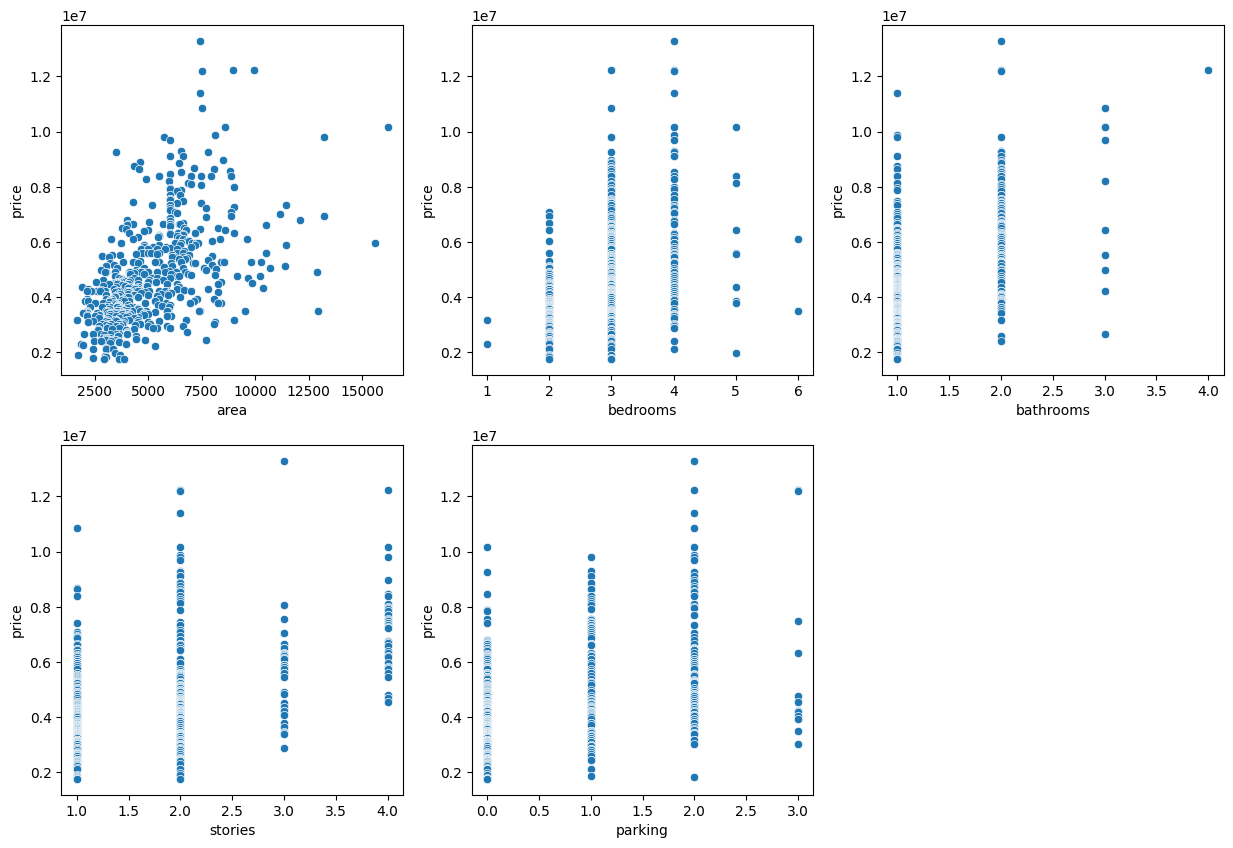

In [64]:
plt.figure(figsize=(15,10))
fig = 1

for col in num_cols:
    plt.subplot(2,3,fig)
    sns.scatterplot(num_cols,x=col,y=target_col)
    fig+=1

### Visualisasi kolom kategorik berdasarkan kolom target

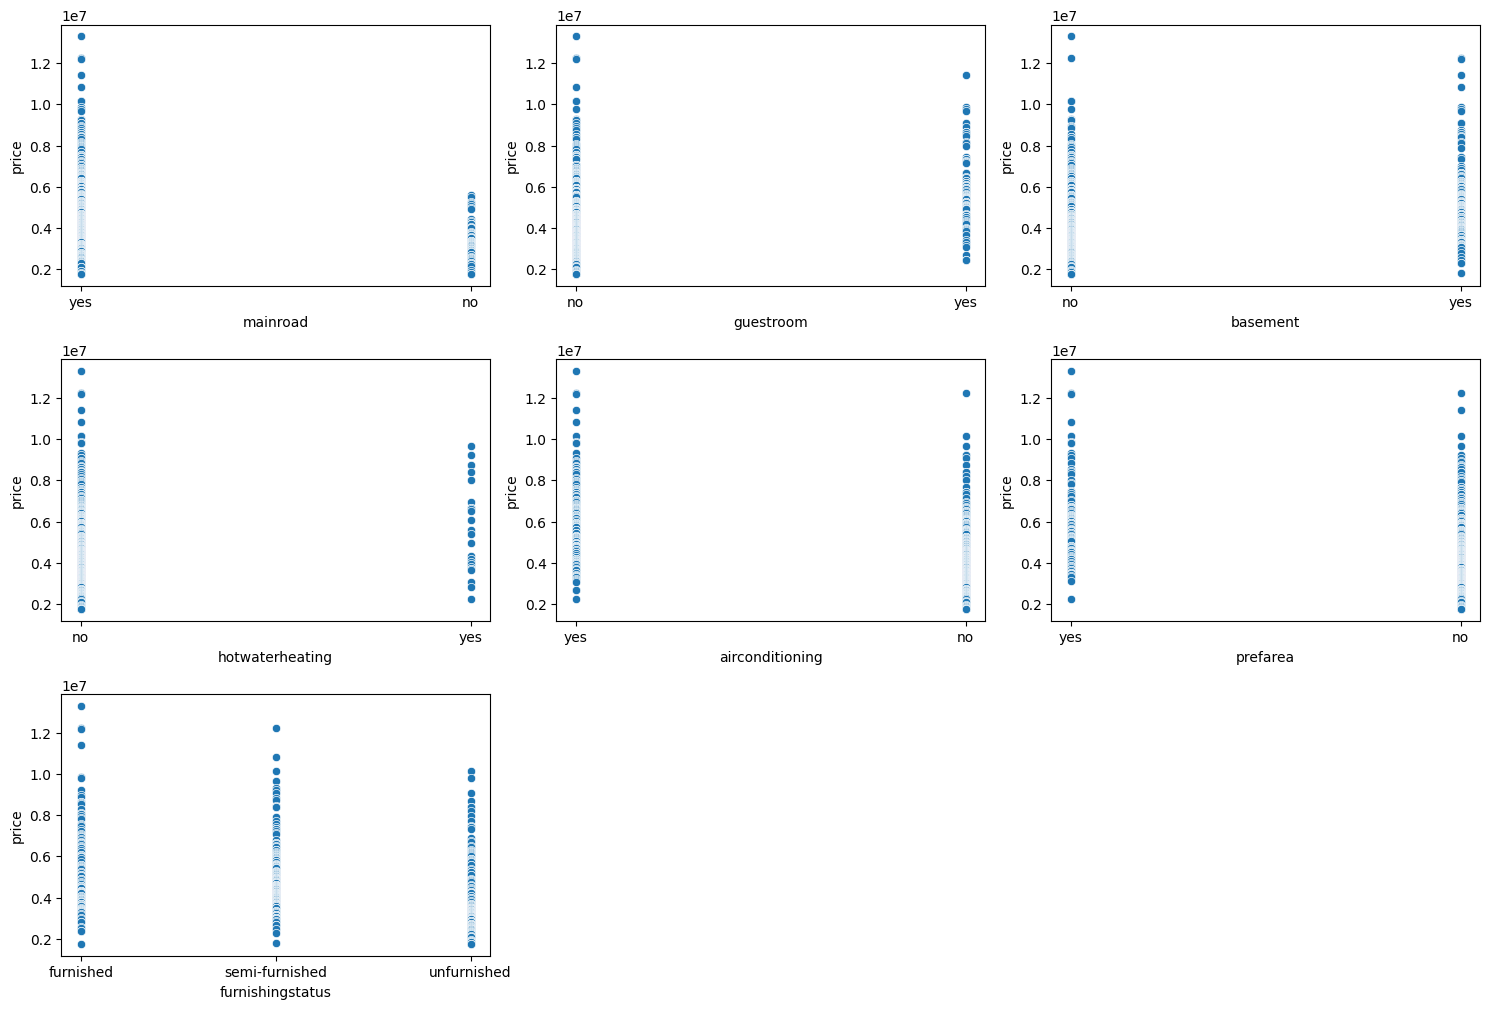

In [66]:
plt.figure(figsize=(15,10))
fig = 1
for col in cat_cols:
    plt.subplot(3,3,fig)
    plt.tight_layout()
    sns.scatterplot(cat_cols,x=col,y=target_col)
    fig+=1

### Visualisasi untuk melihat korelasi kolom target dengan pairplot dan heatmap

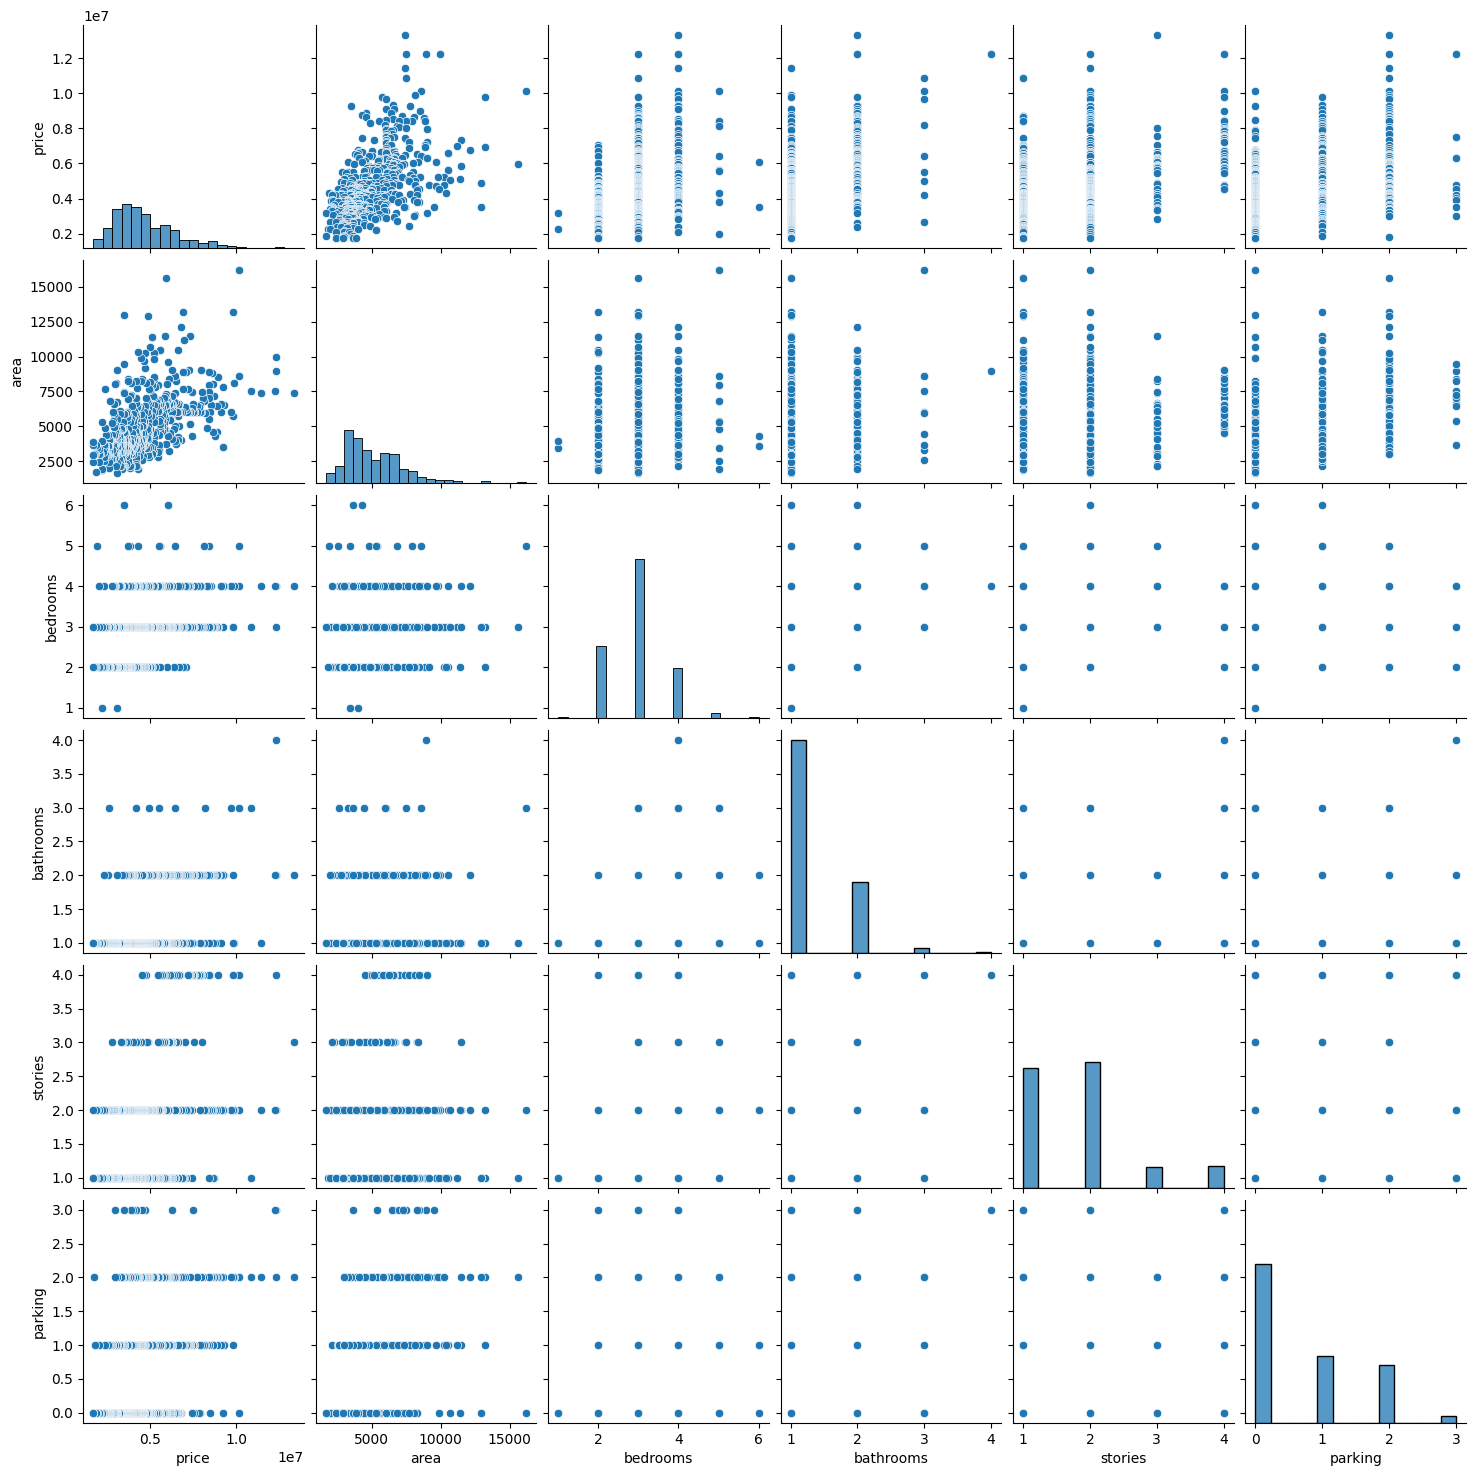

In [68]:
sns.pairplot(df)

In [73]:
corr = df.corr()
corr

C:\Users\pikri\AppData\Local\Temp\ipykernel_5316\949583003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


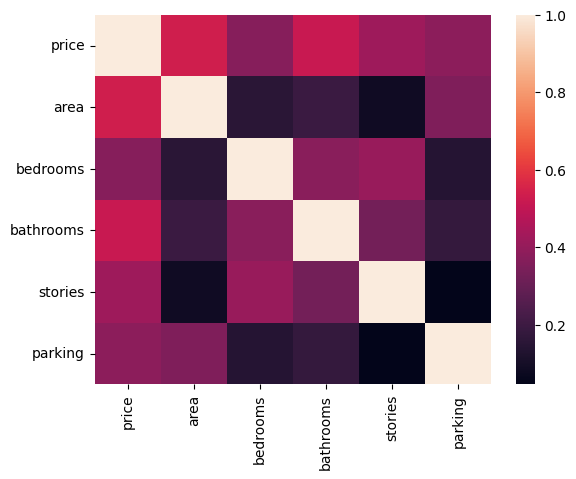

In [74]:
sns.heatmap(corr);

## Kesimpulan 

- Ukuran dataset yaitu 545 baris dan 13 kolom
- Tidak ada data yang kosong dan terduplikat
- Tidak ada data anomali dalam tiap baris
- Tipe data terdiri dari int64 dan object
- Kolom numerik:
	- Kebanyakan data kita memiliki area 3000ft s/d 5000ft 
	- Jumlah kamar tidur paling banyak 3 kamar
	- Jumlah kamar mandi paling banyak 1 ruang
	- Jumlah stories/lantai paling banyak 1 - 2 lantai
	- Banyak rumah yang tidak memiliki tempat parkir
	- Kolom numerik terindikasi pencilan/outliers

- Kolom kategorik: 
	- Banyak yang berlokasi di dekat jalan utama (mainroad)
	- Banyak yang tidak memiliki ruang tamu (guestroom)
	- Banyak yang tidak memiliki basement
	- Banyak yang tidak memiliki pemanas air (waterheating)
	- Banyak yang tidak memiliki AC (air conditioning)
	- Banyak yang berada di area yang tidak disukai (prefea). Bisa jadi karena lingkungan dan fasilitas umum
	- Kebanyakan properti semi-furnished daripada unfurnished dan furnished

- Kolom target:
	- Rata-rata harga properti berkisar 47.000.000

- Visualisasi berdasarkan target:
	- Kolom target:
		- Kolom area memiliki korelasi dengan kolom target(price). Bisa dilihat dari persebaran dimana ketika area semakin luas harga juga semakin naik
		- Kolom bedrooms memiliki korelasi yang lumayan sedikit. Bisa dilihat ketika jumlah kamar semakin banyak maka harga(price) juga naik, akan tetapi jika kamar lebih dari 4 properti tersebut tidak banyak yang berminat
		- Begitupun dengan kolom kamar mandi, jika jumlah kamar mandi semakin banyak maka harga(price) juga naik, akan tetapi jika kamar mandi lebih dari 3 properti tersebut tidak banyak yang berminat
		- Kolom stories, paling banyak properti dengan 1 - 2 lantai
		- Kolom parkir, properti lebih banyak tidak punya ruang parkir (0) - 2 ruang parkir
	- Kolom kategorik: 
		- Tidak ada korelasi untuk kolom kategorik

- Visualisasi Heatmap:
	- Kolom total luas area dan jumlah kamar mandi memiliki korelasi lebih dari 50%